In [1]:
%matplotlib inline

# Preprocessing

Raw data rarely comes in the form and shape that is necessary fot the optimal performance learning algorithm. For example, many machine learning algorithms also require that the selected features are on the same scale for optimal performance, which is often achieved by the features in range [0,1] or a standard normal distribution with zero mean and unit variance.

In [12]:
import pandas as pd
from io import StringIO
csv_data = '''A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    0.0,11.0,12.0,
'''
csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1,2,3,4
1,5,6,NaN,8
2,0,11,12,NaN


## Imputing missing values

Sometimes, the removal of samples or dropping of entire feature columns is simply not feasible, because we might lose too much valuable data. To solve this problem we can use different **interpolation** techniques to estimate the missing valus from the other training samples in our dataset, for example, the **mean interpolation**.

In [14]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [  0. ,  11. ,  12. ,   6. ]])

## Dimensionality Reduction

### Feature Selection

Some of the selected features may be **highly correlated and therefore redundant** to a certain degree. Reducing the dimensionality of our feature space has the advantage that less storage space is required, and the learning algorithm can run much faster.

The motivation behind feature selection algorithms is to automatically select a subset of features that are most relevant to the problem to improve computational efficiency or reduce the generalization error of the model by removing irrelevant features or noise, which can be useful for algorithms that don't support regularization. A classical sequential feature selection algorithm is **Sequential Backward Selection (SBS)**, which aims to reduce the dimensionality of the initial feature subspace with a minimum decay in performance of the classifier to improve upon computational efficiency.

In [16]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data # we use two features for visualization purposes
y = iris.target

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)

In [17]:
from feature_selection import SBS
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 2)
sbs = SBS(knn, k_features = 1)
sbs.fit(X_train, y_train)

<feature_selection.SBS instance at 0x10909bef0>

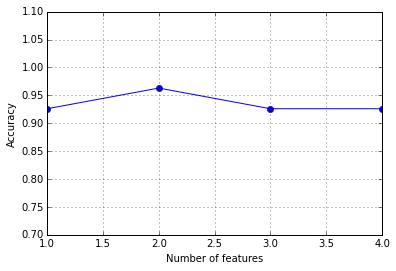

In [18]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

In [18]:
# More Information
from IPython.display import IFrame
IFrame('http://scikit-learn.org/stable/modules/feature_selection.html', width=900, height=350)

### Another dataset

In [19]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
       header=None)

from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
            train_test_split(X,y, test_size=0.2, random_state=1)

In [20]:
from feature_selection import SBS
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors = 2)
sbs = SBS(knn, k_features = 1)
sbs.fit(X_train, y_train)

<feature_selection.SBS instance at 0x10a0cba70>

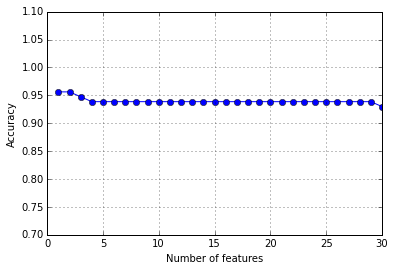

In [21]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

### Feature Extraction
We derive information from the feature set to construct a new feature subspace.